In [1]:
%load_ext autoreload
%autoreload 2

# load environment variables
import os
from dotenv import load_dotenv, find_dotenv
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine

from src.functions.io import ModuleFileReader
from src import queries
scripts = ModuleFileReader(queries)

In [2]:
engine = create_engine(os.environ.get("DATABASE_URL"))

## Basic Film View

In [3]:
films = pd.read_sql_query(scripts.read("film_view1.sql"), engine)
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 14 columns):
id                  2195 non-null int64
title               2195 non-null object
released            2195 non-null datetime64[ns]
runtime             2195 non-null int64
rated               2195 non-null object
budget              1413 non-null float64
total_gross         1617 non-null float64
award_noms          2195 non-null int64
award_wins          2195 non-null int64
oscar_noms          2195 non-null int64
oscar_wins          2195 non-null int64
ratings_imdb        2191 non-null float64
ratings_meta        1961 non-null float64
ratings_tomatoes    1992 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(6), object(2)
memory usage: 240.2+ KB


- budget and total gross are floats due to NAN values
- only have about 64% of the data for budget and total gross

In [4]:
# to get rid of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
films.describe()

,id,runtime,budget,total_gross,award_noms,award_wins,oscar_noms,oscar_wins,ratings_imdb,ratings_meta,ratings_tomatoes
count,2195.000,2195.000,1413.000,1617.000,2195.000,2195.000,2195.000,2195.000,2191.000,1961.000,1992.000
mean,1173.786,106.777,42836213.730,129894953.644,13.958,4.542,0.160,0.067,6.433,55.952,58.287
std,683.256,18.754,50295565.756,226340867.456,32.250,18.155,0.697,0.432,0.992,17.864,27.950
min,1.000,2.000,1.000,1463.000,0.000,0.000,0.000,0.000,1.500,1.000,0.000
25%,576.500,94.000,10000000.000,8100000.000,0.000,0.000,0.000,0.000,5.800,43.000,35.000
50%,1174.000,104.000,25000000.000,43000000.000,2.000,0.000,0.000,0.000,6.500,56.000,63.000
75%,1763.500,117.000,50000000.000,140705322.000,12.000,0.000,0.000,0.000,7.100,69.000,83.000
max,2360.000,212.000,300000000.000,2068223624.000,326.000,235.000,10.000,7.000,9.400,100.000,100.000


- most films get no award noms, mean is being skewed by outliers
- min budget being a dollar seems wrong

In [6]:
films[films.budget == 1.0]

,id,title,released,runtime,rated,budget,total_gross,award_noms,award_wins,oscar_noms,oscar_wins,ratings_imdb,ratings_meta,ratings_tomatoes
1479,1771,Comic-Con Episode IV: A Fan's Hope,2011-09-10,88,PG-13,1.000,nan,0,0,0,0,7.000,64.000,83.000


In [7]:
films[films.runtime == 212.0]

,id,title,released,runtime,rated,budget,total_gross,award_noms,award_wins,oscar_noms,oscar_wins,ratings_imdb,ratings_meta,ratings_tomatoes
461,686,Ben-Hur,2016-08-19,212,G,100000000.000,94100000.000,13,17,0,0,8.100,90.000,87.000


- the runtime here has been confused with the 1959 version of Ben Hur

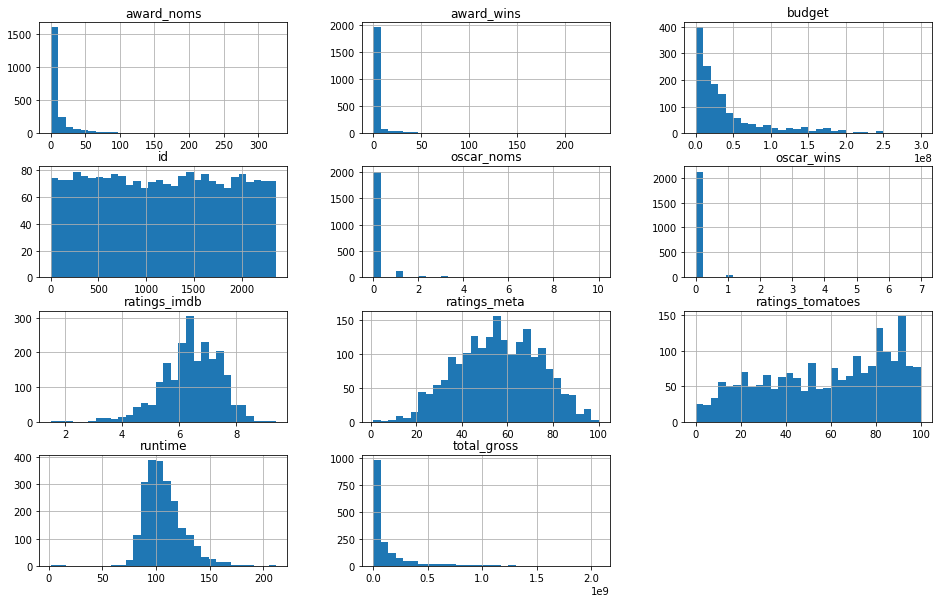

In [8]:
films.hist(bins=30, figsize=(16,10))
plt.show()

 - awards, budget, total gross also seem to follow pareto distribution, long right tails
 - runtime almost normally distributed except for no left side tail - very few short feature films

### Number of films each year

In [9]:
films_by_year = pd.read_sql_query(scripts.read("films_by_year_count.sql"), engine)

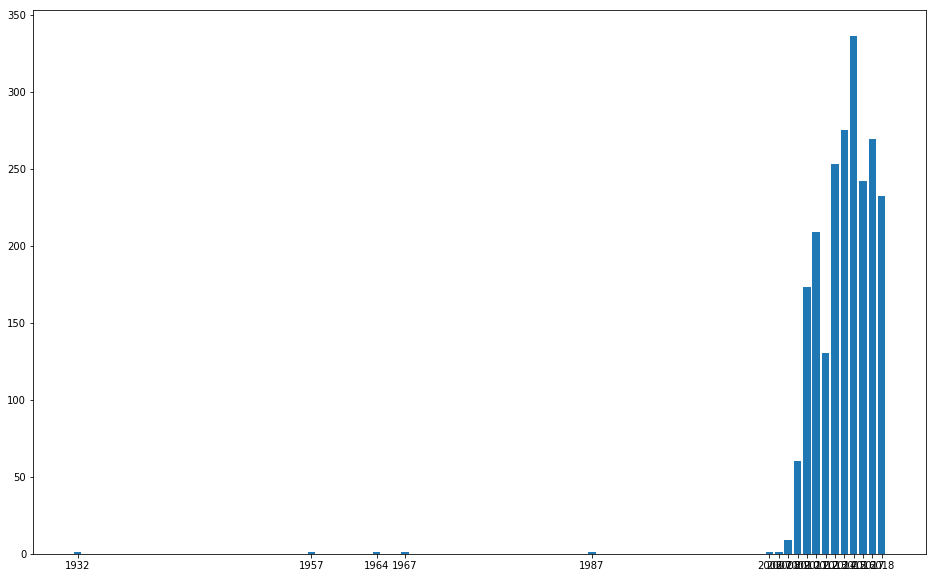

In [10]:
plt.figure(figsize=(16,10))
plt.bar(films_by_year.year, films_by_year.num_films)
plt.xticks(films_by_year.year)
plt.show()

- somehow some older movies snuck into the data

In [11]:
films[films.released < '2010-01-01']

,id,title,released,runtime,rated,budget,total_gross,award_noms,award_wins,oscar_noms,oscar_wins,ratings_imdb,ratings_meta,ratings_tomatoes
1180,251,The Silence,1964-02-03,96,R,nan,nan,1,0,0,0,8.000,nan,92.000
1190,2310,Like Dandelion Dust,2009-02-25,100,PG-13,nan,nan,0,0,0,0,7.100,nan,82.000
1237,2270,Lebanon,2009-09-08,93,R,nan,nan,15,0,0,0,6.900,85.000,90.000
1249,2183,OSS 117: Lost in Rio,2009-04-15,101,NOT RATED,26700000.000,21900000.000,0,0,0,0,6.900,58.000,78.000
1251,2211,Rosencrantz and Guildenstern Are Undead,2009-01-19,89,R,nan,nan,0,0,0,0,5.100,45.000,43.000
1268,2288,Mao's Last Dancer,2009-09-13,117,PG,25000000.000,22300000.000,20,0,0,0,7.300,55.000,55.000
1284,2124,Videocracy,2009-08-28,85,NOT RATED,nan,nan,3,0,0,0,6.500,60.000,67.000
1289,2191,Here and There,2009-04-22,85,NOT RATED,nan,nan,2,0,0,0,6.400,57.000,nan
1308,2102,Wonderful World,2009-06-05,89,R,nan,nan,0,0,0,0,6.200,48.000,42.000
1319,2105,44 Inch Chest,2009-10-19,95,R,nan,nan,2,0,0,0,5.800,47.000,41.000


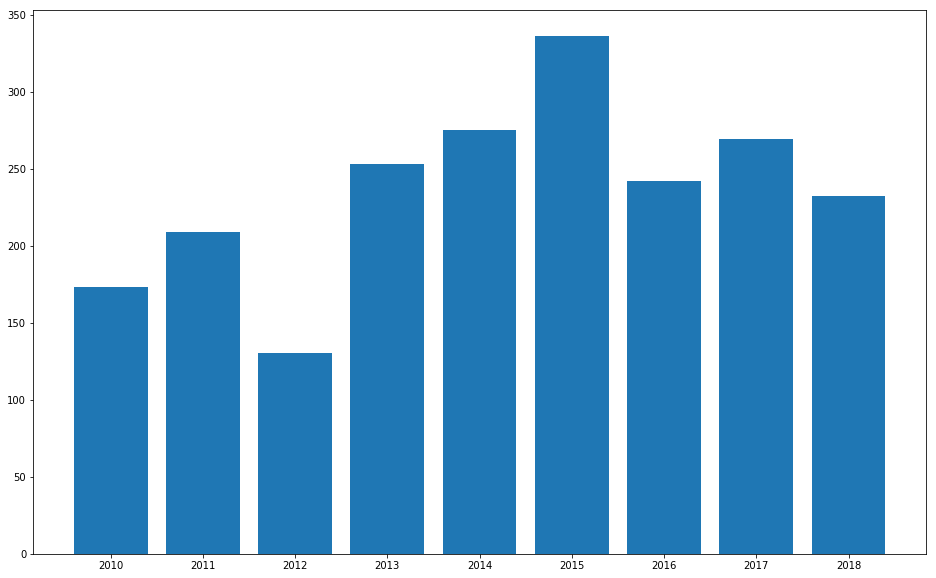

In [12]:
films_by_year = films_by_year[films_by_year.year > 2009]
plt.figure(figsize=(16,10))
plt.bar(films_by_year.year, films_by_year.num_films)
plt.xticks(films_by_year.year)
plt.show()

## Released

Index films view on year:

In [13]:
films = films.set_index(pd.DatetimeIndex(films.released))
years = list(films[films.index.year > 2009].index.year.unique())
years = sorted(years)

In [14]:
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

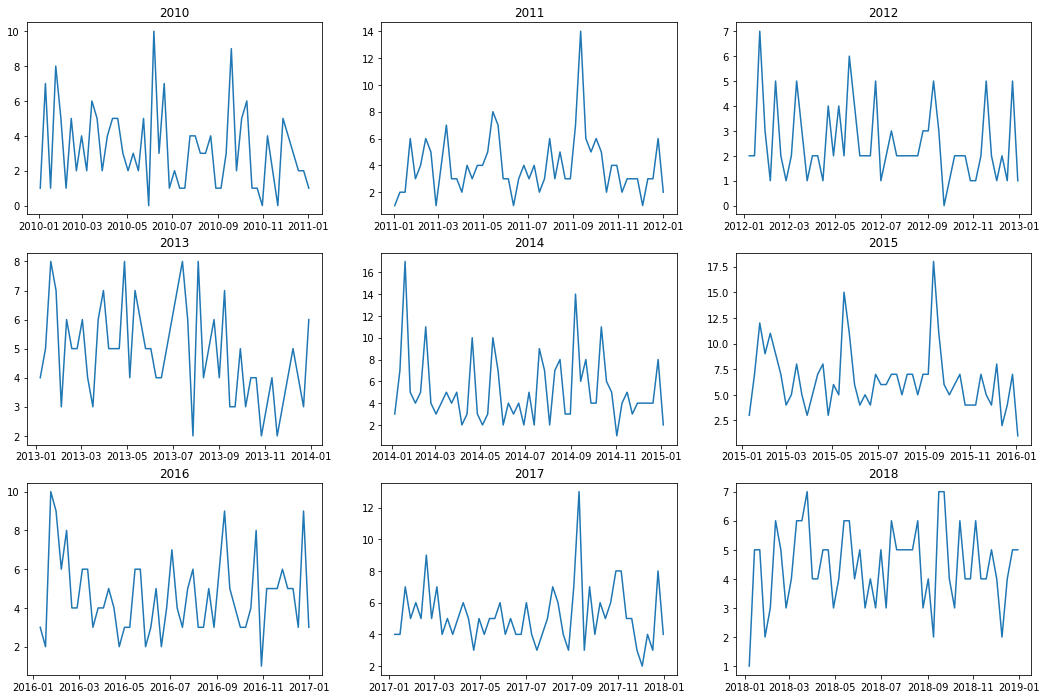

In [15]:
plt.figure(figsize=(18,12))
for i,x in enumerate(years):
    plt.subplot(3,3,i + 1)
    films_that_year = films[films.index.year == x]
    weekly = films_that_year.resample('W').count()['id']
    plt.plot(weekly.index, weekly.values)
    plt.title(str(x))

- No standard release schedule for all films over the years
- At least in the past couple years September - October has packed window

## Genres

In [16]:
genres_one_hot = pd.read_sql_query(scripts.read("genres_one_hot.sql"), engine)

In [17]:
genres_one_hot.head()

,id,horror,mystery,thriller,action,crime,drama,comedy,history,war,...,sci-fi,biography,fantasy,animation,adventure,family,sport,western,documentary,musical
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
genres_only = genres_one_hot.drop("id", axis=1)
genres_only.head()

,horror,mystery,thriller,action,crime,drama,comedy,history,war,music,...,sci-fi,biography,fantasy,animation,adventure,family,sport,western,documentary,musical
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


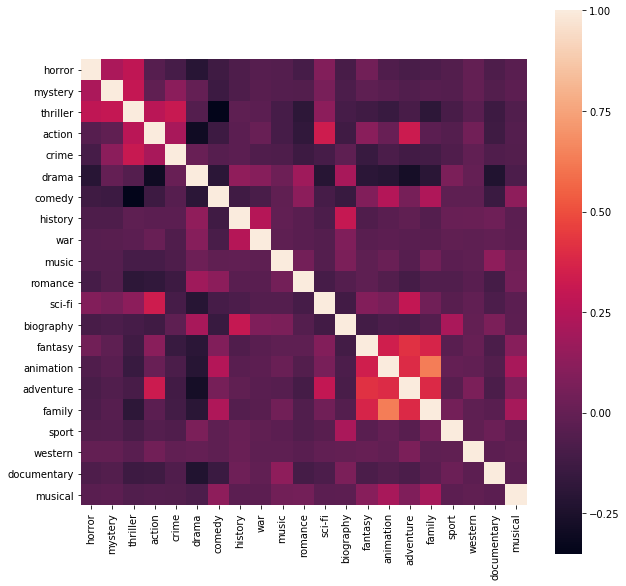

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(genres_only.corr(), square=True)

- Pearson correlation matrix
- animation/family, fantasy/adventure, biography/history, crime/thriller all have strong postive correlations
- adventure/drama has a surprising weak negative correlation
- no comedy/thriller movies lol

In [20]:
films_w_genres = pd.read_sql_query(scripts.read('films_join_hot_genres.sql'), engine)
films_w_genres.set_index(pd.DatetimeIndex(films_w_genres.released), inplace=True)
films_w_genres.head()

,id,title,released,runtime,rated,budget,total_gross,award_noms,award_wins,oscar_noms,...,sci-fi,biography,fantasy,animation,adventure,family,sport,western,documentary,musical
released,,,,,,,,,,,,,,,,,,,,,
2018-01-05,1,Insidious: The Last Key,2018-01-05,103,PG-13,10000000.000,167885588.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-12,5,The Commuter,2018-01-12,105,PG-13,40000000.000,200900000.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-12,6,Proud Mary,2018-01-12,89,R,14000000.000,21800000.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-12,8,Freak Show,2018-01-12,91,N/A,2000000.000,18216.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-19,12,12 Strong,2018-01-19,130,R,35000000.000,70800000.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
films_by_genres = pd.read_sql_query(scripts.read('films_by_genre.sql'), engine)

In [22]:
films_by_genres.set_index(pd.DatetimeIndex(films_by_genres.released), inplace=True)
genre_counts = films_by_genres.genre.value_counts()

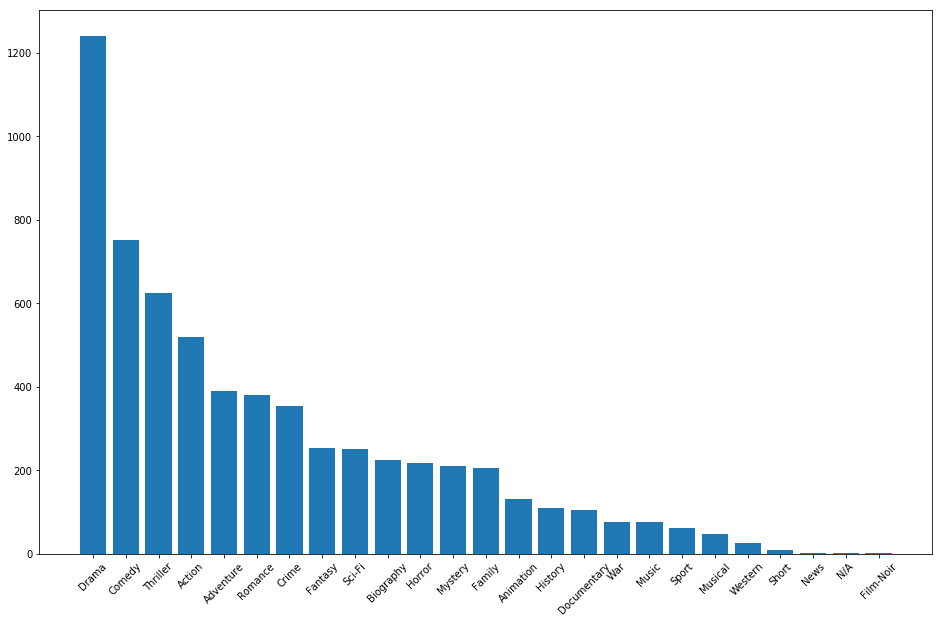

In [23]:
plt.figure(figsize=(16,10))
plt.bar(genre_counts.index, genre_counts)
plt.xticks(rotation=45)
plt.show()

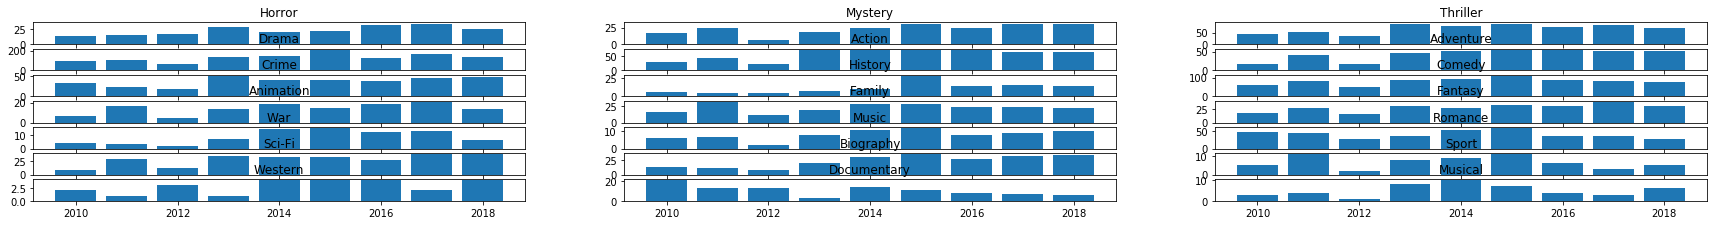

In [24]:
genres = films_by_genres.genre.unique()[:-4] # no shorts, news, film-noir, N/A
films_by_genres = films_by_genres[films_by_genres.index.year > 2009]
n_genres = len(genres)
plt.figure(figsize=(30,10))
for ix, genre in enumerate(genres):
    plt.subplot(n_genres, 3, ix + 1)
    genre_films = films_by_genres[films_by_genres.genre == genre]
    yearly = genre_films.groupby(genre_films.index.year).count()['title']
    plt.title(genre)
    plt.bar(yearly.index, yearly.values)

- Scale of drama is highest
- Westerns, documentaries are very infrequent
- Adventure, mystery, thriller, sci-fi doing well
- \# of horror, mystery films is slightly trending upwards

In [25]:
awards_ratings_genres = films_w_genres[films_w_genres.columns[7:]]

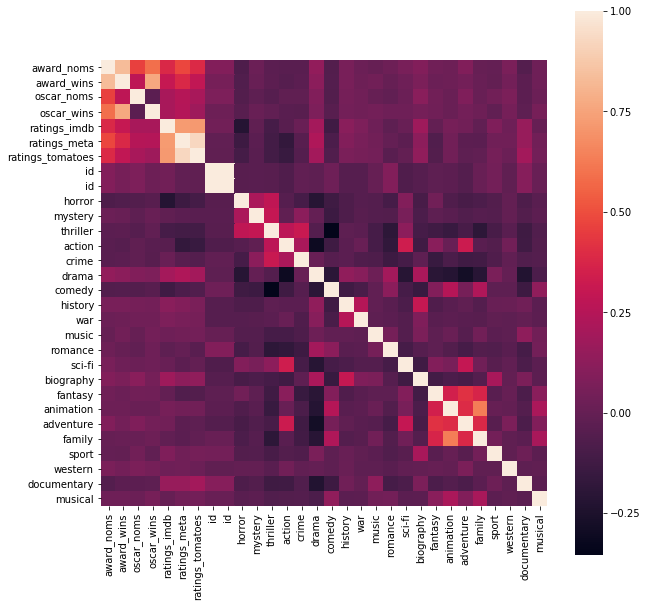

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(awards_ratings_genres.corr(), square=True)

- drama has slight correlation with higher ratings/awards, but most genres don't
- problem w nominal/categorical attributes? is this a proper correlation

In [27]:
genre_financials = pd.read_sql_query(scripts.read('genre_financials.sql'), engine)
genre_financials.head()
mean_roi = genre_financials.groupby('genre').mean()['roi']
median_roi = genre_financials.groupby('genre').median()['roi']

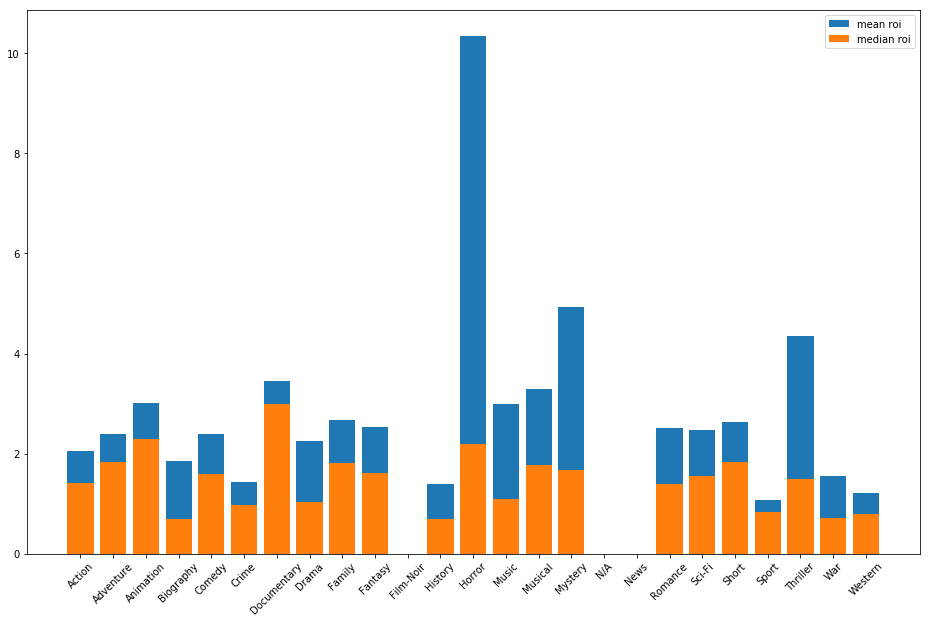

In [28]:
plt.figure(figsize=(16,10))
plt.bar(mean_roi.index, mean_roi, label='mean roi')
plt.bar(median_roi.index, median_roi, label='median roi')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [29]:
genre_financials.groupby('title').mean().sort_values('roi', ascending=False)

,id,budget,domestic_gross,foreign_gross,total_gross,roi
title,,,,,,
The Gallows,1005.000,100000.000,22764410.000,20200000.000,43000000.000,429.000
The Devil Inside,1740.000,1000000.000,53261944.000,48496546.000,101800000.000,100.800
Searching,173.000,1000000.000,26020957.000,49434631.000,75400000.000,74.400
Unfriended,1351.000,1000000.000,32482090.000,31574553.000,64099999.000,63.100
Paranormal Activity 2,2327.000,3000000.000,84752907.000,92759125.000,177500000.000,58.167
Get Out,284.000,4500000.000,176040665.000,79366998.000,255407663.000,55.757
Paranormal Activity 3,2066.000,5000000.000,104028807.000,103011037.000,207000000.000,40.400
Annabelle,1408.000,6500000.000,84273813.000,172773848.000,257047661.000,38.546
Chernobyl Diaries,1787.000,1000000.000,18119640.000,19038008.000,37200000.000,36.200


## Financial Summaries

In [30]:
film_financials = pd.read_sql_query(scripts.read('film_financials.sql'), engine)
film_financials.head()

,id,title,budget,domestic_gross,foreign_gross,total_gross,roi
0,1,Insidious: The Last Key,10000000.000,67745330.000,100140258.000,167885588.000,15.789
1,5,The Commuter,40000000.000,36343858.000,83598529.000,200900000.000,4.022
2,6,Proud Mary,14000000.000,20877013.000,876352.000,21800000.000,0.557
3,8,Freak Show,2000000.000,18216.000,0.000,18216.000,-0.991
4,12,12 Strong,35000000.000,45819713.000,21631102.000,70800000.000,1.023


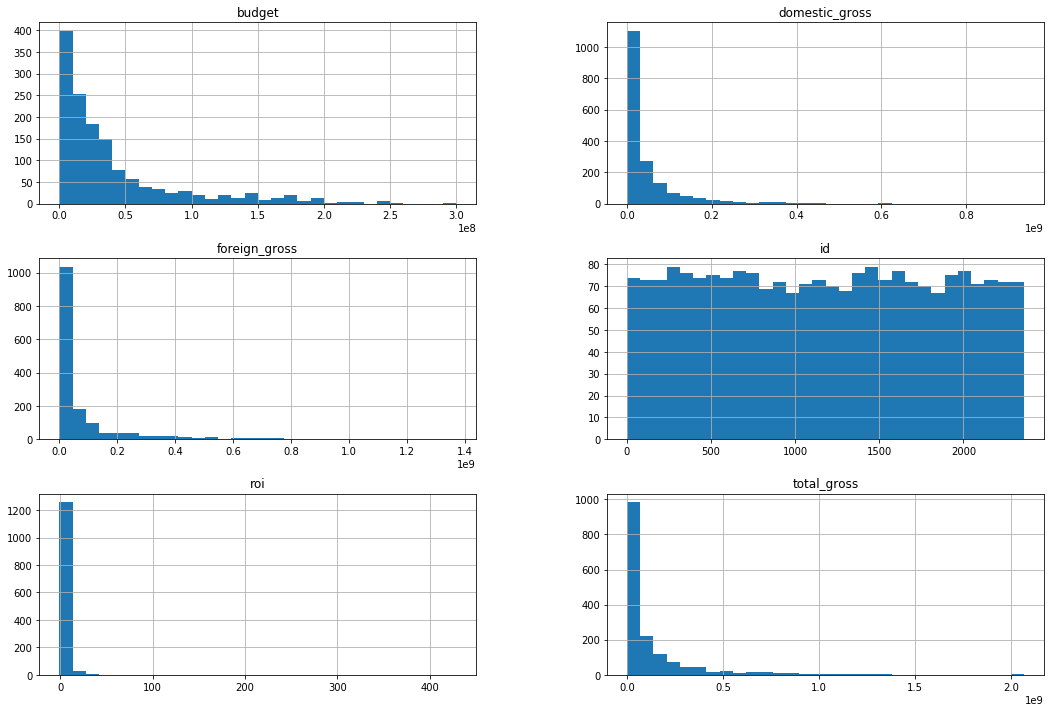

In [31]:
film_financials.hist(bins=30, figsize=(18,12))
plt.show()

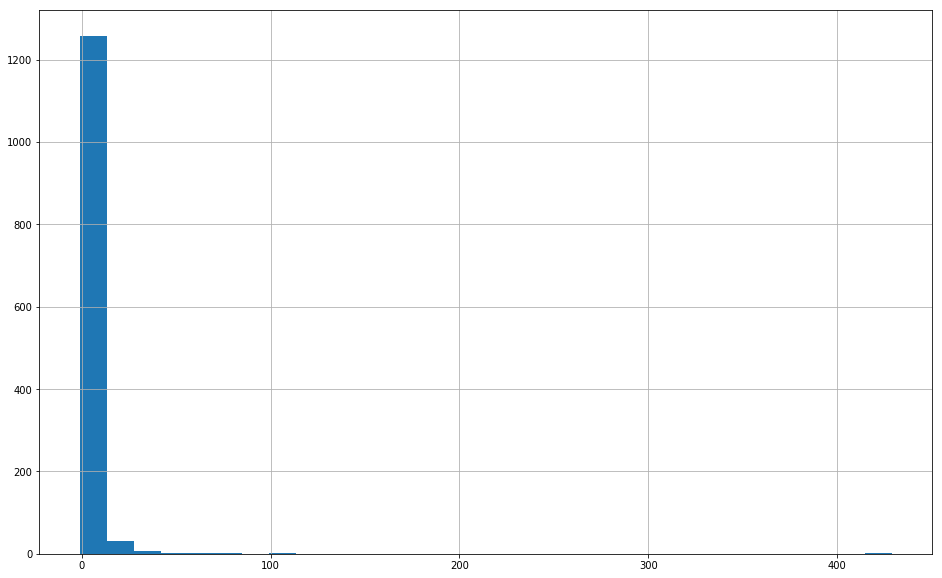

In [32]:
plt.figure(figsize=(16,10))
film_financials.roi.hist(bins=30)

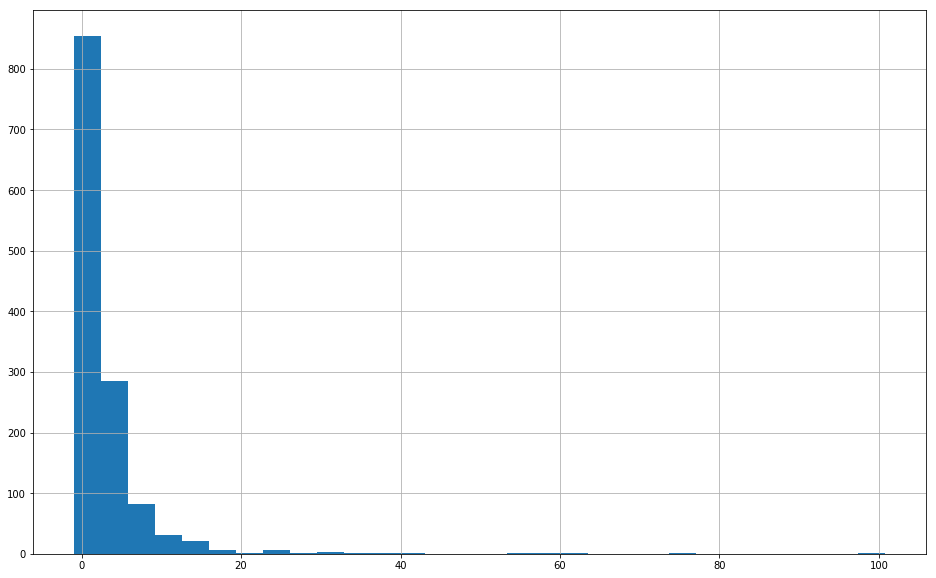

In [33]:
no_gallows = film_financials[film_financials.id != 1005]
plt.figure(figsize=(16,10))
no_gallows.roi.hist(bins=30)

- pareto distribution

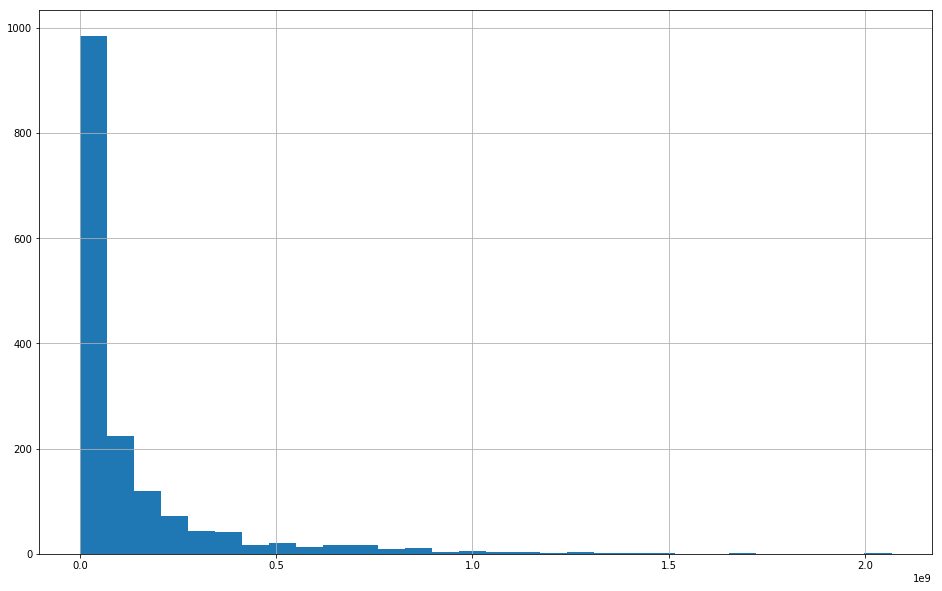

In [34]:
plt.figure(figsize=(16,10))
film_financials.total_gross.hist(bins=30)